<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 6**

### **TUGAS PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [72]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [73]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

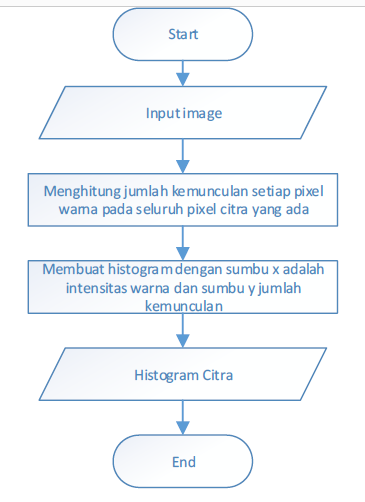

Image Lena


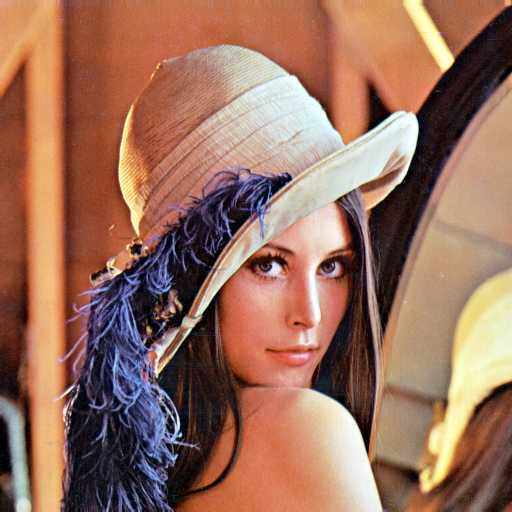

Histogram dari Image Lena


<BarContainer object of 256 artists>

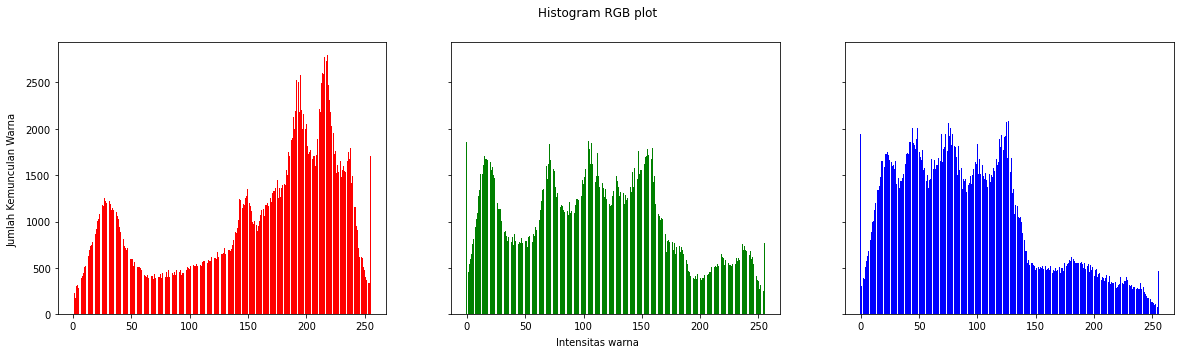

In [74]:
# Input image 
# Image dalam kondisi BGR bukan RGB
image = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Mengitung jumlah kemunculan setiap pixel waena pada seluruh pixel ccitra yang ada

# Menghitung seberapa besar gambar itu dan seperti apa komposisi skala BGR 
height, width, depth = np.shape(image)
intensitas = np.arange(256) #diasumsikan image memiliki ke dalaman 8 bit, sehingga 256 ini menunjukkan jumlah warna keseluruhan dari image

# Karena banyaknya warna diperkirakan ada 256 warna
# Maka, setiap channel RGB dikalikan dengan 256

blue = [0] * 256
green = [0] * 256
red = [0] * 256

# Menghitung jumlah kemunculan tiap pixel
for y in range(0, height):
  for x in range(0, width):
    blue[image[y][x][0]] += 1   # melakukan perhitungan warna blue dari 256 warna yang ada
    green[image[y][x][1]] += 1  # melakukan perhitungan warna green dari 256 warna yang ada
    red[image[y][x][2]] += 1    # melakukan perhitungan warna red dari 256 warna yang ada

# Membuat histogram dengan sumbu x = intensitas warna dan sumbu y = jumlah kemunculan
intensitas = np.arange(256)
fig, ax = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan Warna', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')

# Citra
print("Image Lena")
cv2_imshow(image)

# Histogram citra
print("Histogram dari Image Lena")
ax[0].bar(intensitas, red, color='red')
ax[1].bar(intensitas, green, color='green')
ax[2].bar(intensitas, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

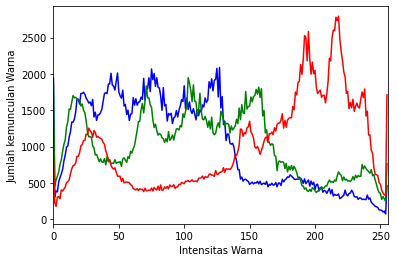

In [75]:
image_lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Membuat histogram citra dengan library Numpy
color = ("B", "G", "R")
channel = (0, 1, 2)

plt.xlim([0, 256])                      # Untuk menyesuaikan batas sumbu x, agar skala-nya 0-256
for channels_id, c in zip(channel, color):
  histogram, bin_edges = np.histogram(
      image_lena[:, :, channels_id], bins=256, range =(0,256) # bins diberi nilai 256 karena untuk membantu melihat jumlah piksel untuk masing-masing dari 256 warna
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan Warna")


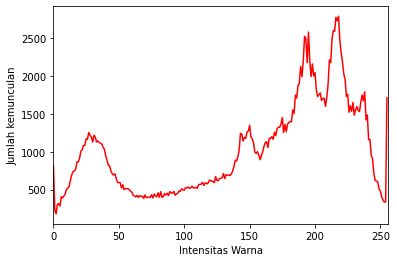

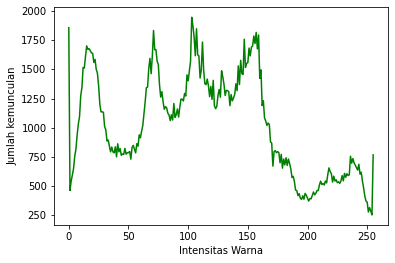

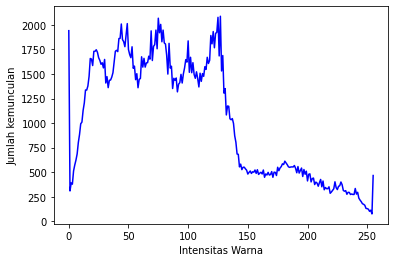

In [76]:
image_lena1 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
# Membuat Histogram Image
colors = ("R","G","B")
channel_ids = (2, 1, 0)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image_lena1[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

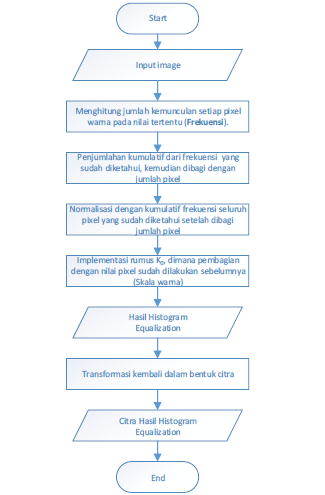

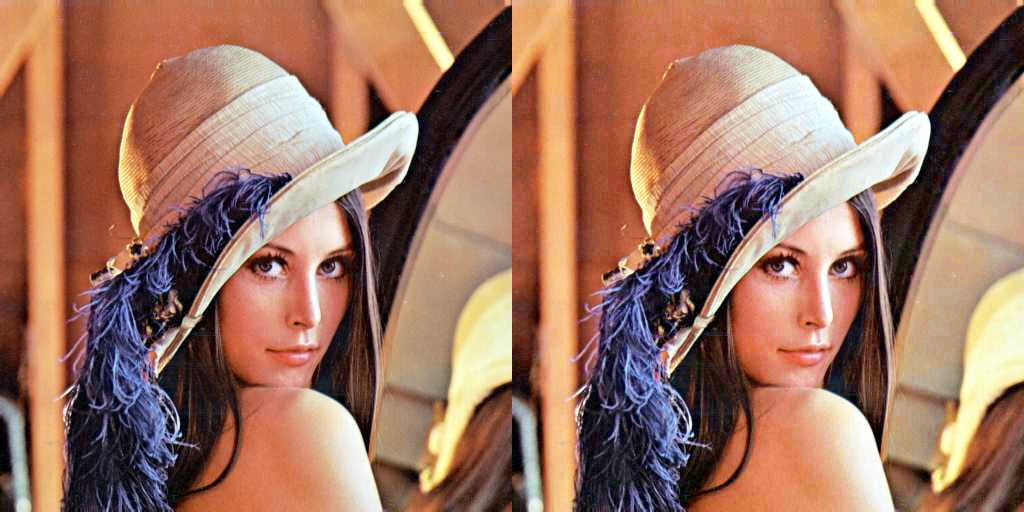

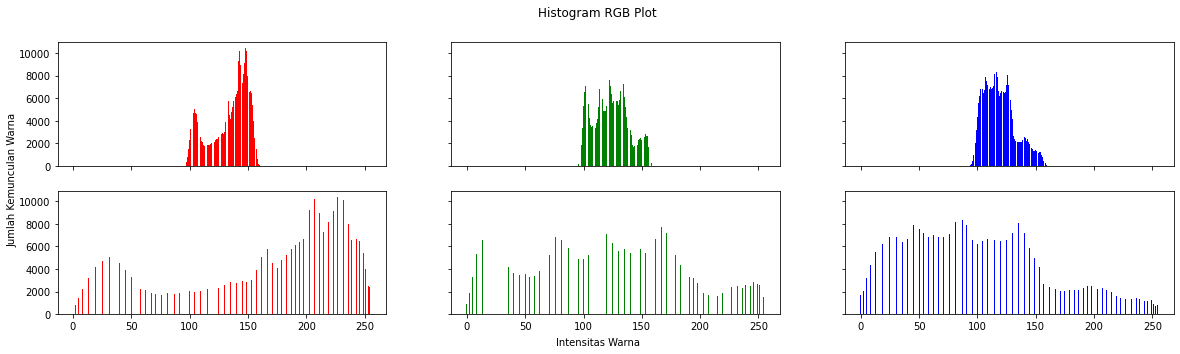

In [80]:
# Input image 
# Image dalam kondisi BGR bukan RGB
image_lc = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

#Menghitung kemunculan setiap pixel warna pada nilai tertentu
def histog(image_lc) :
  height, width, depth = np.shape(image_lc)    # Menghitung kedalaman image
  ax = np.zeros((3,256))  # Mengubah elemen array bernilai 0
  for y in range(0, height) :
    for x in range(0, width) :
      ax[0][image_lc[y][x][0]] +=1
      ax[1][image_lc[y][x][1]] +=1
      ax[2][image_lc[y][x][2]] +=1
  return ax

histogram_original = histog(image_lc) # Mendefinisikan histogram dari image original dengan "histogram_asli"
image_array = np.asarray(image_lc)   # Membentuk array dimensi dari image yang sudah diinputkan (convert NumPy array)

# Mengubah array multi-dimensi menjadi array 1-D
histogram_array = np.bincount(image_array.flatten(), minlength=256)

# Menjumlahkan kumulatif dari frekuensi yang sudah dihitung sebelumnya, kemudian dibagi dengan jumlah keseluruhan pixel
jml_pixels = np.sum(histogram_array)
histogram_array = histogram_array / jml_pixels

#Normalisasikan nilai kumulatif histogram
cumhistogram_array = np.cumsum(histogram_array)

# Tabel pemetaan pixel
transformasi_mapping = np.floor(255 * cumhistogram_array).astype(np.uint8)    # "np.floor" berfungsi untuk pembulatan angka (single number)

# Transformasi 

# Merubah image array ke 1-D list
image_list = list(image_array.flatten())

# Konversi nilai pixel ke dalam equalize
equaliz_img_list = [transformasi_mapping[p] for p in image_list]

# Reshape dan menuliskan kembali ke dalam image array (konversikan kembali dalam bentuk citra)
equaliz_img_array = np.reshape(np.asarray(equaliz_img_list), image_array.shape)
image_modif = equaliz_img_array

equalize_histogram = histog(image_modif)

# Menampilkan image original dan image hasil pengolahan histogram equalization
final_frame = cv.hconcat((image, image_modif))
cv2_imshow(final_frame)

# Membuat histogram dengan sumbu x = intensitas warna dan sumbu y = jumlah kemunculan
intensitas = np.arange(256)
isgrayimage = np.array_equal(blue, green, red)    # Memeriksa apakah 3 array (BGR) memiliki bentuk dan elemen yang sama.
if (isgrayimage == False) :
  fig, ax = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB Plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan Warna', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  ax[0,0].bar(intensitas, histogram_original[2], color='red') 
  ax[0,1].bar(intensitas, histogram_original[1], color='green') 
  ax[0,2].bar(intensitas, histogram_original[0], color='blue') 
  ax[1,0].bar(intensitas, equalize_histogram[2], color='red') 
  ax[1,1].bar(intensitas, equalize_histogram[1], color='green')
  ax[1,2].bar(intensitas, equalize_histogram[0], color='blue') 

else:
  fig, ax = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB Plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan Warna', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  ax[0,0].bar(intensitas, histogram_original[2], color='gray') 
  ax[0,1].bar(intensitas, equalize_histogram[1], color='gray') 


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

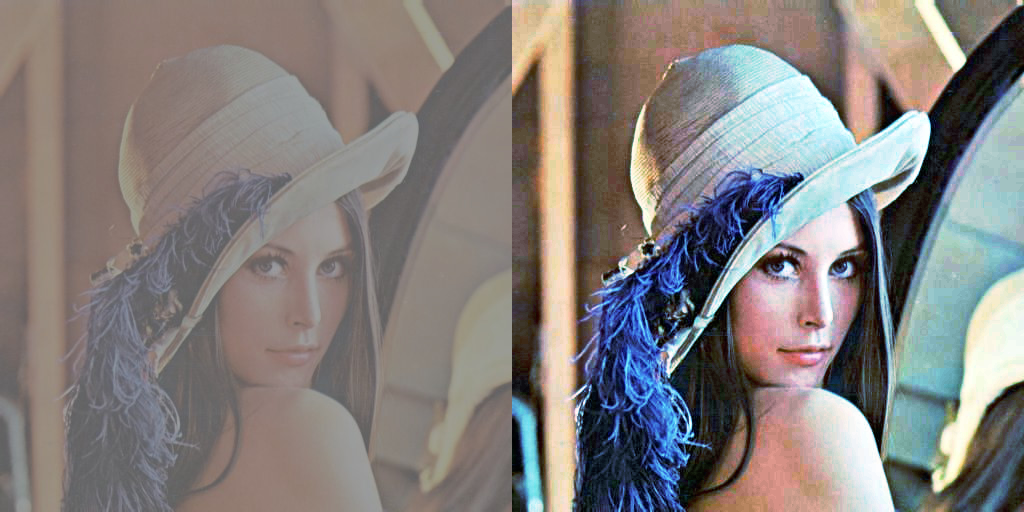

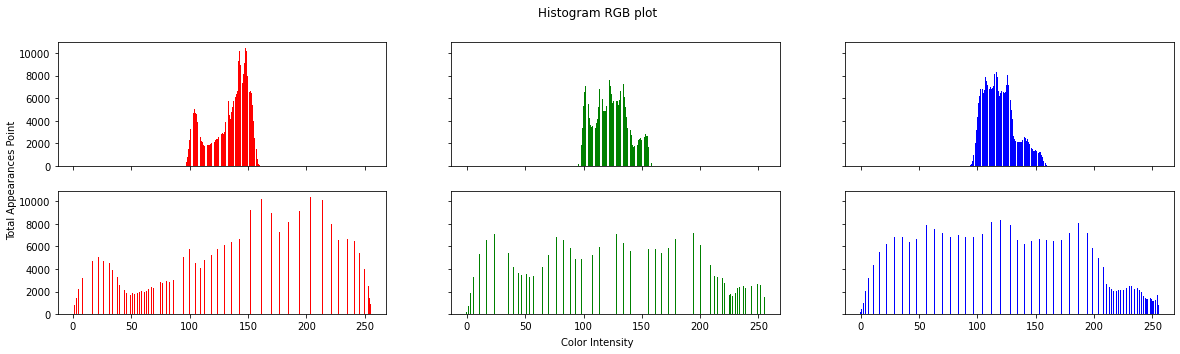

In [81]:
image_lc = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
# Membagi multi-channel image ke dalam single-channel images yang terpisah

channels = cv.split(image_lc)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((image_lc, eq_image))
cv2_imshow(final_frame)


# Membuat histogram dengan sumbu x = intensitas warna dan sumbu y = jumlah kemunculan
intensitas = np.arange(256)
isgrayimage = np.array_equal(blue, green, red)    # Memeriksa apakah 3 array (BGR) memiliki bentuk dan elemen yang sama.
if (isgrayimage == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Total Appearances Point', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(intensitas, histogram_original[2], color='red')
  axs[0,1].bar(intensitas, histogram_original[1], color='green')
  axs[0,2].bar(intensitas, histogram_original[0], color='blue')
  axs[1,0].bar(intensitas, equal_histo[2], color='red')
  axs[1,1].bar(intensitas, equal_histo[1], color='green')
  axs[1,2].bar(intensitas, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Total Appearances Point', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(intensitas, histogram_original[2], color='gray')
  axs[0,1].bar(intensitas, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg) 

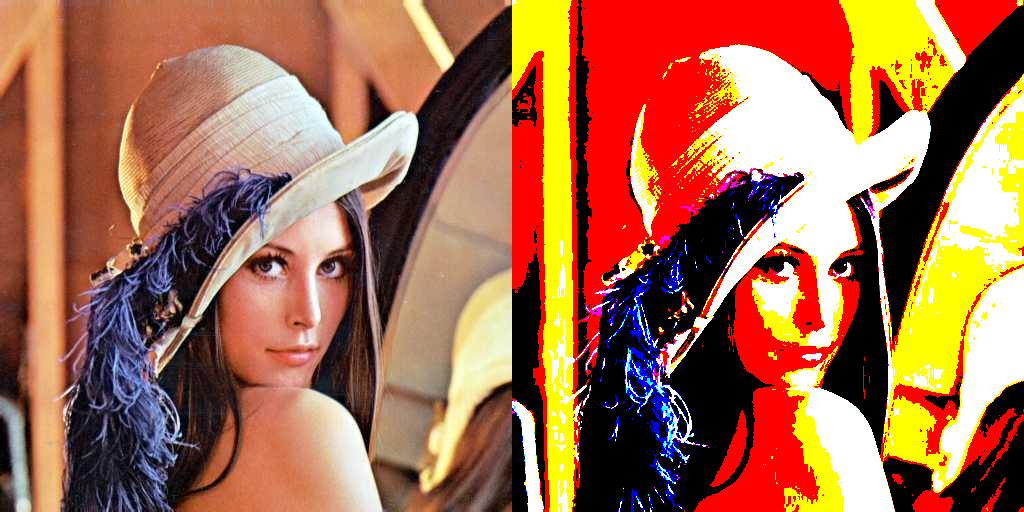

In [91]:
img_lena_original = cv.imread('/content/drive/MyDrive/Images//lena.jpg')

def warnaTerdekat (red, green, blue):
  pValue = 0
  minimumDistance = 255*255 + 255*255 + 255*255 + 1
  palletteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for a in range(len(palletteColor)):
    redDiff = red - palletteColor[a][0]
    greenDiff = green - palletteColor[a][1]
    blueDiff = blue - palletteColor[a][2]
    distance = redDiff*redDiff + greenDiff*greenDiff + blueDiff*blueDiff
    if (distance < minimumDistance):
      minimumDistance = distance
      pValue = a
  return pValue

palletteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16million = cv.cvtColor(img_lena_original, cv.COLOR_BGR2RGB)
image_8 = np.zeros(img_16million.shape, img_16million.dtype)

for y in range(0, img_16million.shape[0]):
  for x in range(0, img_16million.shape[1]):
    baru = warnaTerdekat(img_16million[y, x, 0], img_16million[y, x, 1], img_16million[y, x, 2])
    image_8[y, x] = palletteColor[baru]
    
img_16million = cv.cvtColor(img_16million, cv.COLOR_BGR2RGB)
image_8 = cv.cvtColor(image_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16million, image_8))
cv2_imshow(final_frame)

8.	Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bawah ini! (Gunakan gambar wiki.jpg) 

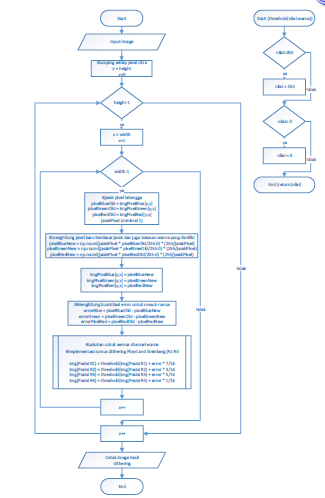

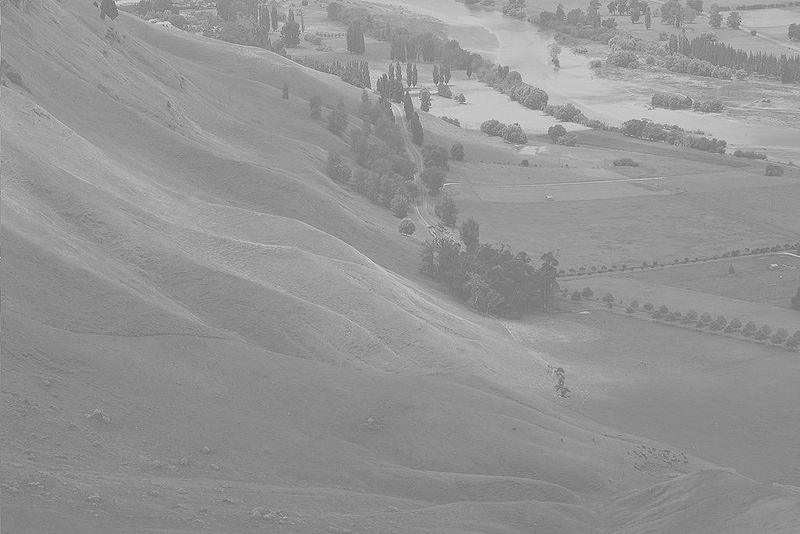

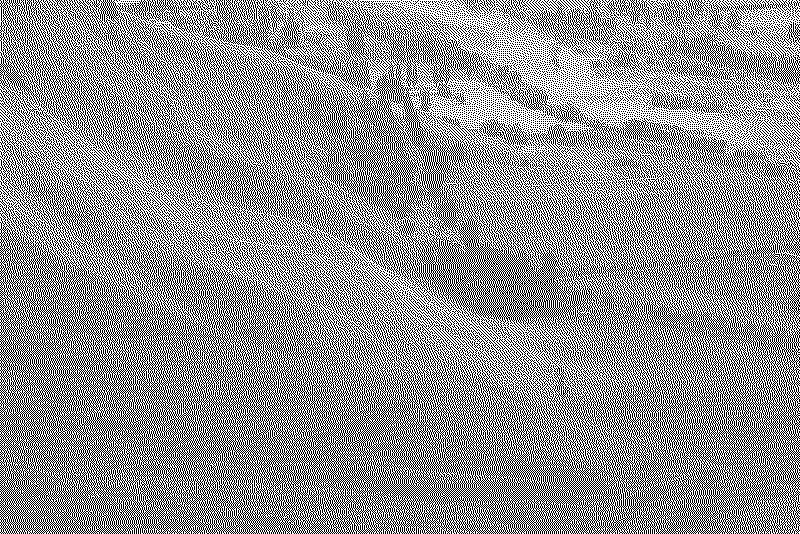

In [84]:
from PIL import Image   # Library open-source tambahan untuk Python yang fungsi utamanya adalah memanipulasi file gambar.
import cv2
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/wiki.jpg')
Image = img

grayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

# Mendefinisikan value height dan width
height = grayImage.shape[0]
width = grayImage.shape[1]

for y in range(0, height) :
  for x in range(0, width) :
    warna_asli = grayImage[y,x]
    warna_terdekat = 0
    if (warna_asli > 128) :
      warna_terdekat = 255
    grayImage[y, x] = warna_terdekat

# Error difusi Floyd and Steinberg yang harus dilakukan setelah sebuah pixel(x,y) diubah nilainya ke warna terdekat
    Error = warna_asli - warna_terdekat

    if(x+1 < width):
      value = grayImage[y, x+1] + Error * 7/16
      if(value > 255) : value=255
      elif(value < 0) : value=0
      grayImage[y, x+1] = value

    if(x>0 and y+1 < height):
      value = grayImage[y+1, x-1] + Error * 3/16
      if(value > 255) : value=255
      elif(value < 0) : value=0
      grayImage[y+1, x-1] = value
    
    if(y+1 < height):
      value = grayImage[y+1, x] + Error * 5/16
      if(value > 255) : value=255
      elif(value < 0) : value=0
      grayImage[y+1, x] = value
    
    if(y+1 < height and x+1 < width):
      value = grayImage[y+1, x+1] + Error * 1/16
      if(value > 255) : value=255
      elif(value < 0) : value=0
      grayImage[y+1, x+1] = value

cv2_imshow(img)
cv2_imshow(grayImage)


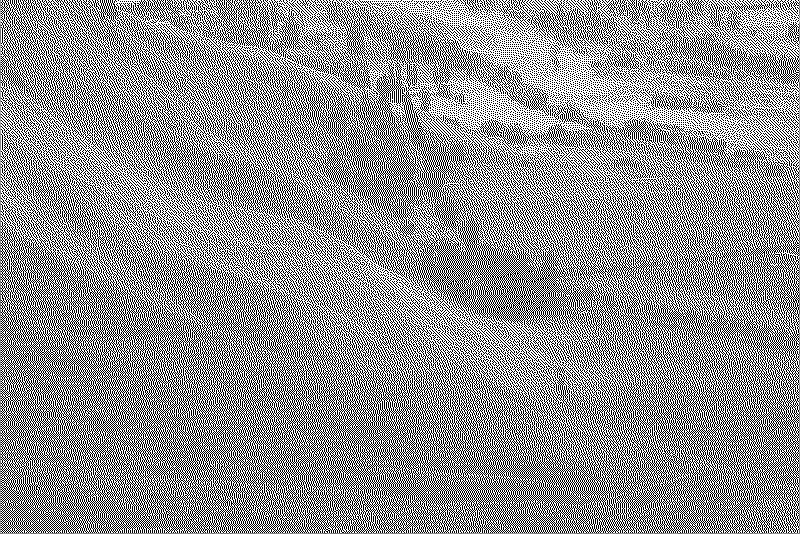

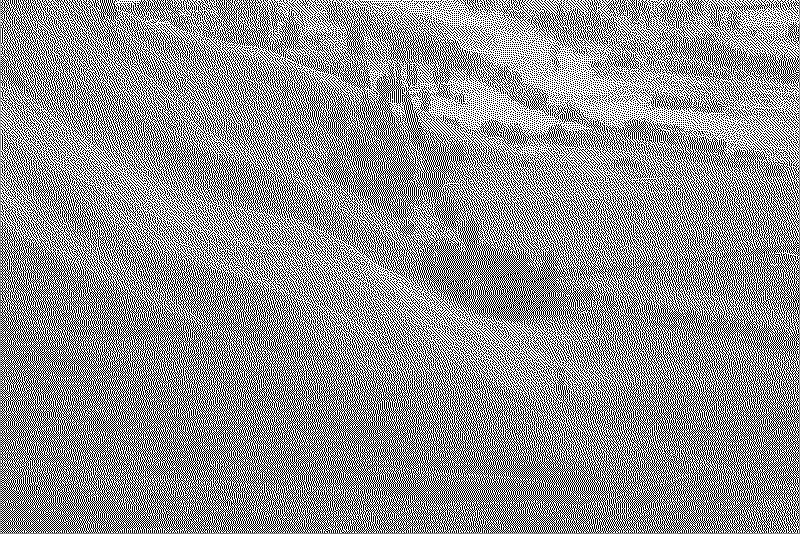

In [85]:
import cv2
import numpy as np


def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

#read image
img = cv2.imread('/content/drive/MyDrive/Images/wiki.jpg')
Image = img

def dithering_gray(Image, samplingF):
    #https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
    height = Image.shape[0]
    width = Image.shape[1]
    
    # loop over the image
    for y in range(0, height-1):
        for x in range(1, width-1):
            # threshold the pixel
            old_pixel = Image[y, x]
            new_pixel = np.round(samplingF * old_pixel/255.0) * (255/samplingF)
            Image[y, x] = new_pixel
            
            Error = old_pixel - new_pixel
            

            Image[y, x+1] = minmax(Image[y, x+1] + Error * 7 / 16.0)
            Image[y+1, x-1] = minmax(Image[y+1, x-1] + Error * 3 / 16.0)
            Image[y+1, x] = minmax(Image[y+1, x] + Error * 5 / 16.0)
            Image[y+1, x+1] = minmax(Image[y+1, x+1] + Error * 1 / 16.0)


    # return the thresholded image
    return Image




def dithering_color(Image, samplingF):
    #https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
    height = Image.shape[0]
    width = Image.shape[1]
     
    # loop over the image
    for y in range(0, height-1):
        for x in range(1, width-1):
            # threshold the pixel
            old_b = Image[y, x, 0]
            old_g = Image[y, x, 1]
            old_r = Image[y, x, 2]
            
            new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
            new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
            new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)


            Image[y, x, 0] = new_b
            Image[y, x, 1] = new_g
            Image[y, x, 2] = new_r




            Error_b = old_b - new_b
            Error_g = old_g - new_g
            Error_r = old_r - new_r


            Image[y, x+1, 0] = minmax(Image[y, x+1, 0] + Error_b * 7 / 16.0)
            Image[y, x+1, 1] = minmax(Image[y, x+1, 1] + Error_g * 7 / 16.0)
            Image[y, x+1, 2] = minmax(Image[y, x+1, 2] + Error_r * 7 / 16.0)
            
            Image[y+1, x-1, 0] = minmax(Image[y+1, x-1, 0] + Error_b * 3 / 16.0)
            Image[y+1, x-1, 1] = minmax(Image[y+1, x-1, 1] + Error_g * 3 / 16.0)
            Image[y+1, x-1, 2] = minmax(Image[y+1, x-1, 2] + Error_r * 3 / 16.0)


            Image[y+1, x, 0] = minmax(Image[y+1, x, 0] + Error_b * 5 / 16.0)
            Image[y+1, x, 1] = minmax(Image[y+1, x, 1] + Error_g * 5 / 16.0)
            Image[y+1, x, 2] = minmax(Image[y+1, x, 2] + Error_r * 5 / 16.0)


            Image[y+1, x+1, 0] = minmax(Image[y+1, x+1, 0] + Error_b * 1 / 16.0)
            Image[y+1, x+1, 1] = minmax(Image[y+1, x+1, 1] + Error_g * 1 / 16.0)
            Image[y+1, x+1, 2] = minmax(Image[y+1, x+1, 2] + Error_r * 1 / 16.0)

    # return the thresholded image
    return Image



#color ditering
outMat_color = dithering_color(Image.copy(), 1)
cv2_imshow(outMat_color)


#gray ditering
grayMat = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
outMat_gray = dithering_gray(grayMat.copy(), 1)
cv2_imshow(outMat_gray)